# Credit Card Lead Prediction



## Scenario
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
 
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 
 
In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

## Problem Statement
Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)



ID | Unique Identifier for a row

Gender | Gender of the Customer

Age | Age of the Customer (in Years)

Region_Code | Code of the Region for the customers

Occupation | Occupation Type for the customer

Channel_Code | Acquisition Channel Code for the Customer  (Encoded)

Vintage | Vintage for the Customer (In Months)

Credit_Product | If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance | Average Account Balance for the Customer in last 12 Months

Is_Active | If the Customer is Active in last 3 Months

Is_Lead(Target) | If the Customer is interested for the Credit Card0 : Customer is not interested1 : Customer is interested



### List of hypothesis we need to check


#### Competitor

* Are my customer using some other banks credit card?
* Are my prducts costly/not good as other banks?
* Is my service not as good as other banks?
* Do most of my customers have accounts in other banks?



#### Demographic

* Do males seem more interested than female in the product or vice versa?
* Do working males are more interested than working females?
* Are housewives have more chance to reject the product?
* Are businessman more interested than salaried/jobless customers?
* Are entrepreneur more interested than other occupation?
* is the male/female ratio of customers having an impact in selling of product?
* Are customers living in more posh are have higher chance of buying the product?
* Is the branch customers are associated with having an impact?
* Is age of customer a reason for him/her to reject the product?
* Are customers in the 20's 30's have high chance of rejecting the product?
* Are customers in the 40's and above have higher chance of buying the product?




#### Behavourial

* Are customers having less than minimum balance in last 4-5 months having high chance of rejecting the product?
* Are customers having salary more than 50,000 interested in the product?
* Are customers having minimun balance in their account rejecting the product?
* Customer who have bought credit card in past has higher chance of buying the product?
* customers who bought any other product in the past have higher chance of buying the product?
* Customers who have not done any transaction in the last 3-4 months will reject it?
* Customers who have not visited the bank in the last 3-4 months will reject it?
* Customers having credit score more than 600 have higher chance of buying the product?


#### Seasonal

* Is festival season having higher chacne of customer buying a product?
* Is unemplyment a reason for not buying credit card?
* what time of year customer do most transactions with credit card?









In [37]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from numpy import sqrt, abs, round
import warnings
from sklearn.preprocessing import LabelEncoder
import copy
warnings.filterwarnings(action = 'ignore')

In [38]:
#checking head of train dataset
train=pd.read_csv(r"C:\Users\YashnaBehera\Desktop\AV course\ML\train_s3TEQDk.csv")
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [40]:
#allocating correct data type to the features
train["Gender"]=train["Gender"].astype("category")
train["Region_Code"]=train["Region_Code"].astype("category")
train["Occupation"]=train["Occupation"].astype("category")
train["Channel_Code"]=train["Channel_Code"].astype("category")
train["Credit_Product"]=train["Credit_Product"].astype("category")
train["Is_Active"]=train["Is_Active"].astype("category")
train["Is_Lead"]=train["Is_Lead"].astype("category")


In [41]:
train.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


we only have 3 numerical varaibles 
* we can see that mean and median of age is almost same so we can say age vairable will be normally distributed
* in vintage mean is greater than median so we can say distribution will be right skewed also std of vintage is also high
* in account balance also mean is greater than median so we can say distribution will be right skewed
* also values are widely spread in avg_account_balance hence std is high

# Exploratory Data Analysis

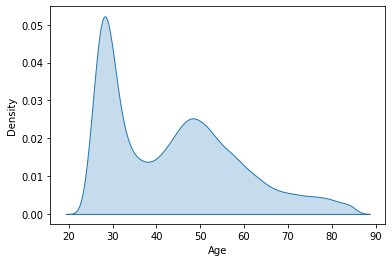

In [42]:
 sns.kdeplot(train.Age, shade=True)

* from the aobve graph we can say the values are a bit right skewed 
* there are lot of customers of age 25-30
* from the box plot we can say there are no outliers in the dataset

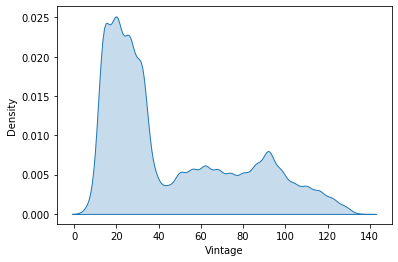

In [43]:
sns.kdeplot(train.Vintage, shade=True)

* from the above graph we can say the variable is right skewed
* There are lot of new customers in our dataset

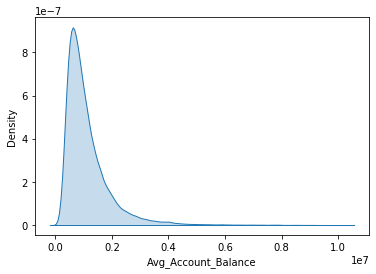

In [44]:
sns.kdeplot(train.Avg_Account_Balance, shade=True)

* from the above graph we can say the variable is right skewed
* There are some customers with very high avg_account_balance that is reason of increase in std
* Need to remove outliers to visualize the plot

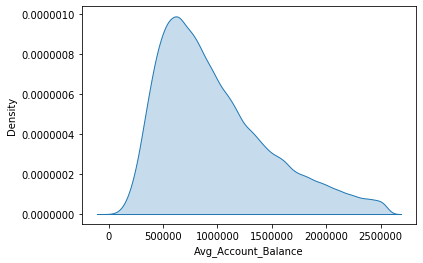

In [45]:
# standard deviation factor
factor = 3

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = train[train["Avg_Account_Balance"] < factor*train["Avg_Account_Balance"].std()]

# ploting graph
sns.kdeplot(cm_data.Avg_Account_Balance, shade=True)

*    After Removing extreme/outliers, plots are still skewed.

**Summary of Numerical Variables:**
*   Age, vintage and avg account balance does not have any significant relation with
*   Distribution of age and vintage variable does not have extream value and outliers but avg account balance even after removing outliers is skewed.

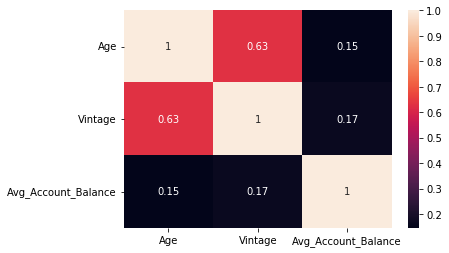

In [46]:
# correlation
sns.heatmap(train.corr(),annot=True)

**Inferences:**
Age and Vintage have moderate correlation as weel as age and channel code

In [47]:
def UVA_category(data, var_group):
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.grid(False)
    plt.tight_layout()

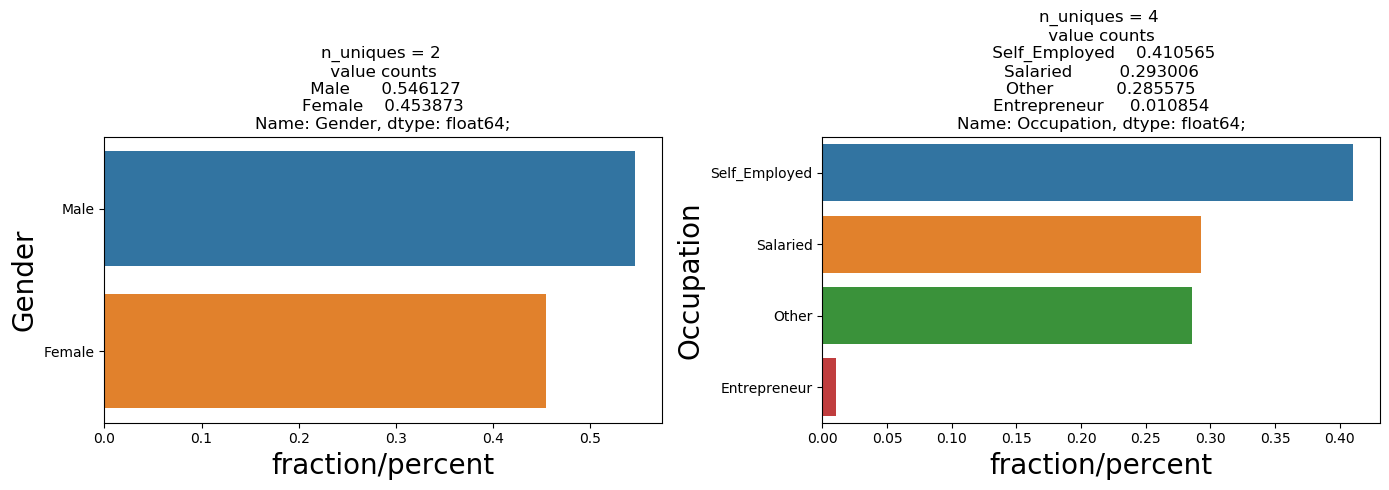

In [48]:
UVA_category(train,["Gender","Occupation"])

  **Gender:**
    *    % Male customers is 54 where as Female customers are 45%.
*    **Occupation:**
    * Majority of people are self_employed.
    * There are extremely few Entrepreneurs.

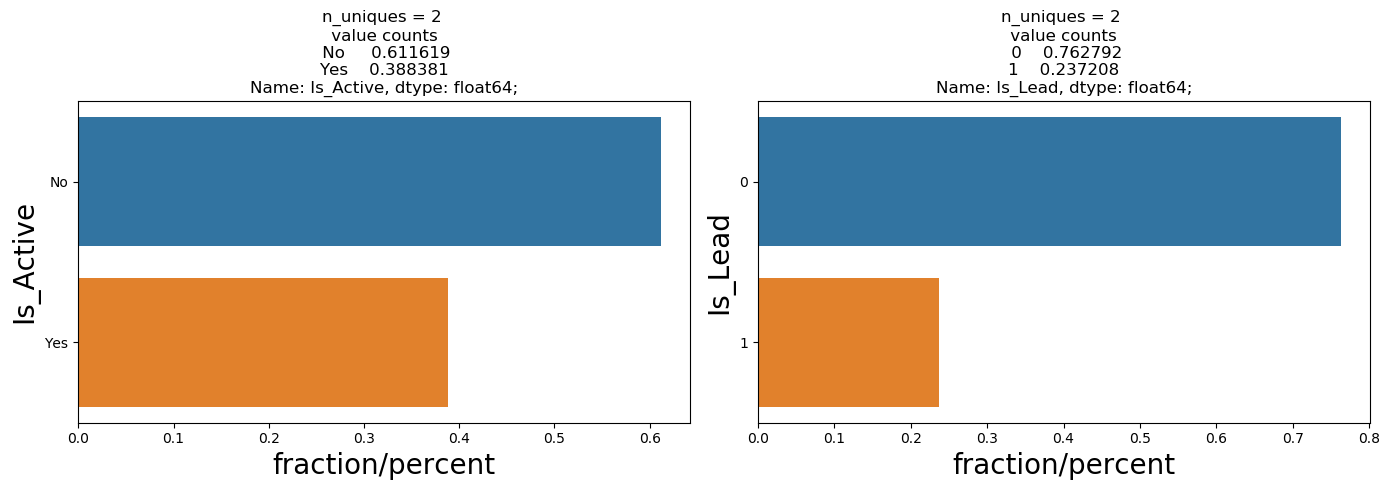

In [49]:
UVA_category(train,["Is_Active","Is_Lead"])

*    **Is_Active:**
    *    61% of customers are not active users.
*    **Is_Lead:**
    *    A very mall majority (23%) of customers are considered lead

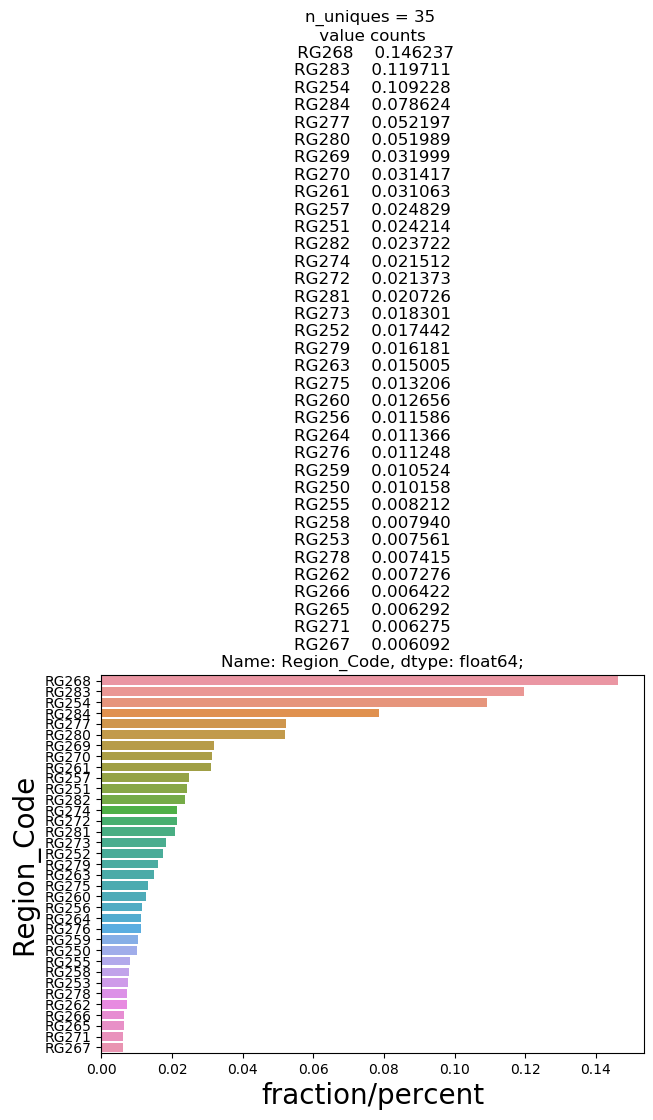

In [50]:
UVA_category(train,["Region_Code"])

**Summary:**
for "region code", there are 35 categories. There is clear relation that some region codes are more popular with customers and this trend decreases rapidly.

In [51]:
train['Counts'] = train.groupby(['Region_Code'])['Occupation'].transform('count')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Counts
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,35934
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,12826
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,35934
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,7720
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,5829


In [52]:
train.Counts.value_counts()

35934    35934
29416    29416
26840    26840
19320    19320
12826    12826
12775    12775
7863      7863
7720      7720
7633      7633
6101      6101
5950      5950
5829      5829
5286      5286
5252      5252
5093      5093
4497      4497
4286      4286
3976      3976
3687      3687
3245      3245
3110      3110
2847      2847
2793      2793
2764      2764
2586      2586
2496      2496
2018      2018
1951      1951
1858      1858
1822      1822
1788      1788
1578      1578
1546      1546
1542      1542
1497      1497
Name: Counts, dtype: int64

In [53]:
#binning frequency of regions into 4 categories where 1 
#being the lowest and 4 highest frequency region w
bins = [18, 40, 55, 70, 120]
labels = ['18-39','40-54', '55-69', '70+']
train['agerange'] = pd.cut(train.Age, bins, labels = labels,include_lowest = True)

bins = [7,46, 77,110, 140]
labels = ['7-45','46-76', '77-109', '110+']
train['vintage_months'] = pd.cut(train.Vintage, bins, labels = labels,include_lowest = True)

bins = [100000,1000000, 5000000,20000000]
labels = ['low balance','medium balance','high balance']
train['balance_status'] = pd.cut(train.Avg_Account_Balance, bins, labels = labels,include_lowest = True)

bins = [1000, 2000, 5000, 10000, 36000]
labels = ['1','2', '3', '4']
train['region_type'] = pd.cut(train.Counts, bins, labels = labels,include_lowest = True)
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Counts,agerange,vintage_months,balance_status,region_type
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,35934,70+,7-45,medium balance,4
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,12826,18-39,7-45,low balance,4
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,35934,55-69,7-45,medium balance,4
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,7720,18-39,7-45,low balance,3
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,5829,18-39,7-45,low balance,3


In [54]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data,color="yellow")
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))
  plt.grid(b=None)
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  
  plt.grid(b=None)

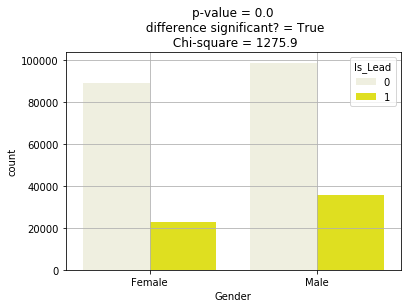

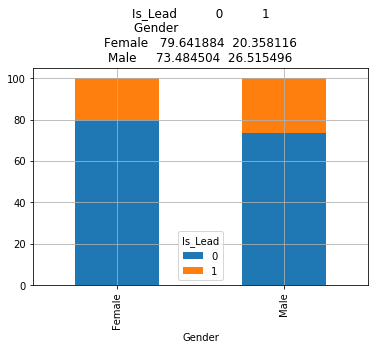

In [55]:
BVA_categorical_plot(train, 'Is_Lead', 'Gender')

**RESULTS:**

- By the p_value of Chi square test, we can assume that the difference between the males and females lead customer is significant (They are independent)/ the gender has a significant impact on the lead target.
- By the frequecies, we can assume that males are more likely to be lead target.

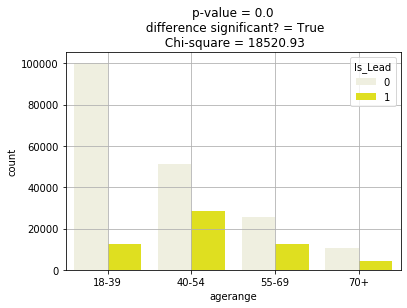

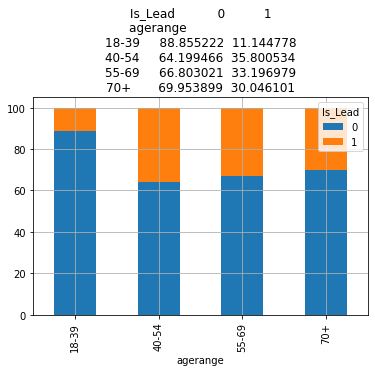

In [56]:
BVA_categorical_plot(train, 'Is_Lead', 'agerange')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Age has a significant impact on the lead target.
- By the frequency, we can assume that customer between the age range of 40-70 are more likely to be lead target than customer betweenage range of 18-40 and 70+ adults.

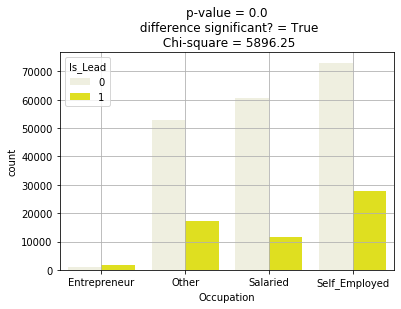

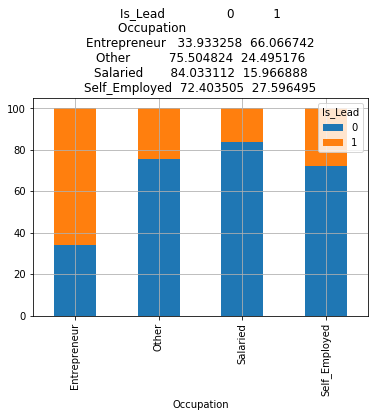

In [57]:
BVA_categorical_plot(train, 'Is_Lead', 'Occupation')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Occupation has a significant impact on the lead target.
- By the frequency, we can assume that entrepreneurs are more likely to become lead tagets than self employed.

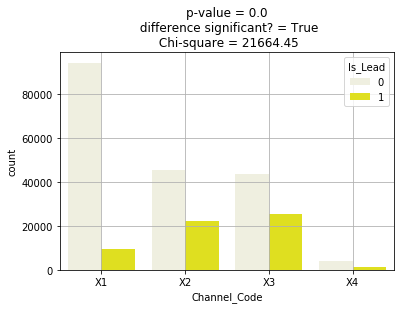

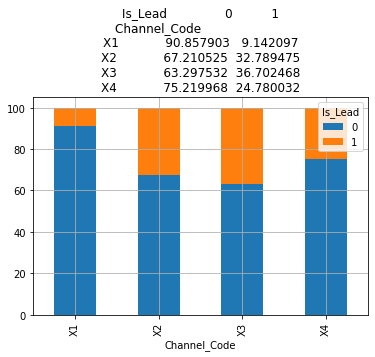

In [58]:
BVA_categorical_plot(train, 'Is_Lead', 'Channel_Code')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the Channel_Code has a significant impact on the lead target.
- By the frequency, we can assume that customers acquired from X3 channel are more likely to become lead tagets than customers coming from X2 channel.

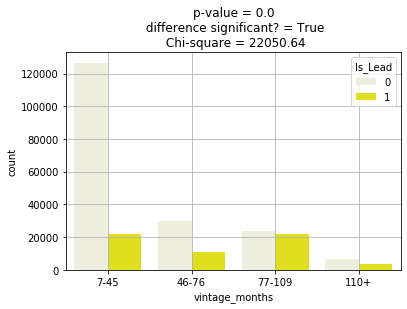

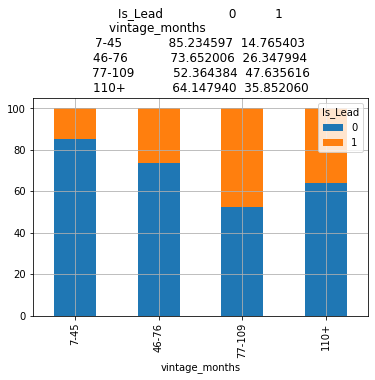

In [59]:
BVA_categorical_plot(train, 'Is_Lead', 'vintage_months')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that the vintage_months has a significant impact on the lead target.
- By the frequency, we can assume that customers who have been with the bank fro 77-109 months (6-9 years) are more likely to become lead tagets than customers who have been with the bank for more tha 109 months (9 years and more).

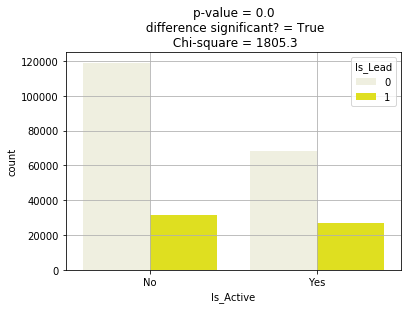

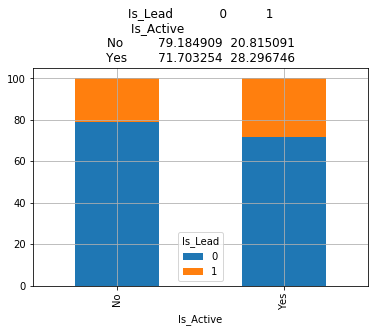

In [60]:
BVA_categorical_plot(train, 'Is_Lead', 'Is_Active')

**RESULTS:**

- By the p_value of the Chi-square test, we can assume that credit_product and Is_Active has a significant impact on the lead target.
- By the frequency, we can assume that customers who are active and have credit product are more likely to become lead tagets.

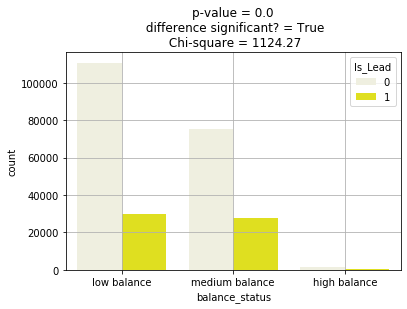

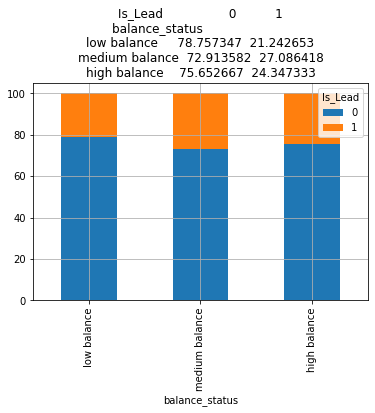

In [61]:
BVA_categorical_plot(train, 'Is_Lead', 'balance_status')

* There is no such difference in the account balance and customer interested in the product

# Missing Value

In [63]:
#checking for null value 
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
Counts                     0
agerange                   0
vintage_months             0
balance_status            78
region_type                0
dtype: int64

In [64]:
train.drop(train.index[112176],inplace=True)

In [65]:
#checking data types
train.dtypes

ID                       object
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
Counts                    int64
agerange               category
vintage_months         category
balance_status         category
region_type            category
dtype: object

In [66]:
#imputing missing values of credit produvts according to vintage
credit_product_mode = train.pivot_table(values='Credit_Product', columns='Vintage', aggfunc=(lambda x: x.mode()[0]))
#channel_mode
miss_bool = train['Credit_Product'].isnull()
train.loc[miss_bool, 'Credit_Product'] = train.loc[miss_bool, 'Vintage'].apply(lambda x:credit_product_mode[x])

In [67]:
#calculating max limit for removing outliers
quant25 = train["Avg_Account_Balance"].quantile(0.25)
quant75 = train["Avg_Account_Balance"].quantile(0.75)
IQR = quant75 - quant25
med = train["Avg_Account_Balance"].median()
whis_high = med+(1.5*IQR)
whis_high

2038130.5

In [68]:
#separating outliers from the dataset
out_rem_acc_train = train[train['Avg_Account_Balance'] < 210000.0]
out_rem_acc_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Counts,agerange,vintage_months,balance_status,region_type
91,NKMDPPAX,Male,28,RG251,Salaried,X1,13,No,187086,No,0,5950,18-39,7-45,low balance,3
423,ZRIXPDBC,Male,33,RG280,Salaried,X1,14,Yes,174190,No,1,12775,18-39,7-45,low balance,4
854,FFH6UUKX,Male,29,RG282,Salaried,X1,14,No,160831,No,0,5829,18-39,7-45,low balance,3
928,BEBGJJDT,Male,33,RG252,Salaried,X1,26,No,209256,No,0,4286,18-39,7-45,low balance,2
1061,JHZJSY6V,Female,31,RG252,Self_Employed,X1,20,No,141643,No,0,4286,18-39,7-45,low balance,2


In [69]:
train['Avg_Account_Balance'].isnull().sum()

0

In [70]:
train['Avg_Account_Balance'] = out_rem_acc_train['Avg_Account_Balance']
train['Avg_Account_Balance'].isnull().sum()

244143

In [71]:
# avg_acc_balance_mean = train.pivot_table(values='Avg_Account_Balance', columns='Vintage', aggfunc='mean')
# avg_acc_balance_mean

In [72]:
avg_acc_balance_mean = train.pivot_table(values='Avg_Account_Balance', columns='Occupation', aggfunc='mean')
avg_acc_balance_mean

Occupation,Entrepreneur,Other,Salaried,Self_Employed
Avg_Account_Balance,175855.0,168966.128947,167904.33595,169519.47331


In [73]:
#replacing average acount balance null values with occupation mean
loc1 = train['Avg_Account_Balance'].isnull()
train.loc[loc1, 'Avg_Account_Balance'] = train.loc[loc1, 'Occupation'].apply(lambda x: avg_acc_balance_mean[x])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "C:\Users\YashnaBehera\anaconda3\lib\site-packages\pandas\core\generic.py", line 1799, in __hash__
    f"{repr(type(self).__name__)} objects are mutable, "
TypeError: 'Series' objects are mutable, thus they cannot be hashed


In [74]:
# loc1 = train['Avg_Account_Balance'].isnull()
# train.loc[loc1, 'Avg_Account_Balance'] = train.loc[loc1, 'Vintage'].apply(lambda x: avg_acc_balance_mean[x])

# LabelEncoding

In [75]:
#labelencoding categorical data
from sklearn.preprocessing import LabelEncoder
train_encoded = train.copy()
train_encoded.loc[:,['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']] = train_encoded.loc[:,['Gender',
                                                            'Occupation','Channel_Code','Credit_Product','Is_Active']].apply(LabelEncoder().fit_transform) 

In [60]:
# train_encoded = train.copy()
# dummy=pd.get_dummies(train_encoded[['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']],drop_first=True)
# X=train.drop(['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],axis=1)
# train_encoded=pd.concat([X,dummy],axis=1)

In [61]:
# # train_encoded = train.copy()
# train_encoded['Gender'] = train_encoded['Gender'].map({"Male" :1, 'Female' :2}).astype(int) 
# train_encoded['Ever_Married'] = train_encoded['Ever_Married'].map({"Yes" :1, 'No' :2}).astype(int) 
# train_encoded['Graduated'] = train_encoded['Graduated'].map({"Yes" :1, 'No' :2}).astype(int) 
# # train_encoded['Profession'] = train_encoded['Profession'].map({"Artist" :1, 'Healthcare' :2, 'Entertainment' :3, 'Engineer' :4,  
# #                                                "Doctor" :5, 'Lawyer' :6, 'Executive' :7, 'Marketing' :8, 'Homemaker' :9, 'Other' :10}).astype(int) 
# # train_encoded['Spending_Score'] = train_encoded['Spending_Score'].map({"Low" :1, 'Average' :2, 'High' :3, 'D' :4}).astype(int)
# # train_encoded['Var_1'] = train_encoded['Var_1'].map({"Cat_6" :1, 'Cat_4' :2, 'Cat_3' :3, 'Cat_2' :4,  
# #                                                "Cat_7" :5, 'Cat_1' :6, 'Cat_5' :7}).astype(int)                                               
# # train_encoded['Segmentation'] = train_encoded['Segmentation'].map({"A" :1, 'B' :2, 'C' :3, 'D' :4}).astype(int) 

In [76]:
train_encoded.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Counts,agerange,vintage_months,balance_status,region_type
0,NNVBBKZB,0,73,RG268,1,2,43,0,168966.128947,0,0,35934,70+,7-45,medium balance,4
1,IDD62UNG,0,30,RG277,2,0,32,0,167904.335950,0,0,12826,18-39,7-45,low balance,4
2,HD3DSEMC,0,56,RG268,3,2,26,0,169519.473310,1,0,35934,55-69,7-45,medium balance,4
3,BF3NC7KV,1,34,RG270,2,0,19,0,167904.335950,0,0,7720,18-39,7-45,low balance,3
4,TEASRWXV,0,30,RG282,2,0,33,0,167904.335950,0,0,5829,18-39,7-45,low balance,3


### Segregating variables: Independent and Dependent Variables

In [77]:
x=train_encoded.drop(["Is_Lead",'Region_Code','Counts','ID','agerange','vintage_months','balance_status'],axis=1)
y=train_encoded["Is_Lead"]
x.shape, y.shape

((245724, 9), (245724,))

### Splitting the data into train set and the test set

In [107]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

### Normalising using *min_max_scaler*

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)

In [109]:
#!pip install xgboost

In [110]:
#importing all necessary models
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier


#importing roc auc score and classification report for checking model accurary
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report as rep
from sklearn import metrics

In [111]:
model1 = KNN(n_neighbors = 10,n_jobs=-1)
model2 = LogReg(class_weight="balanced",n_jobs=-1)
model3 = DecisionTreeClassifier(class_weight="balanced")
model4 = RandomForestClassifier(class_weight="balanced",n_jobs=-1)
model5 = XGBClassifier()

In [112]:
model1.fit(train_x,train_y)
model2.fit(train_x,train_y)
model3.fit(train_x,train_y)
model4.fit(train_x,train_y)
model5.fit(train_x,train_y)

[22:01:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [207]:
print(model1.score(test_x, test_y))
print(model2.score(test_x, test_y))
print(model3.score(test_x, test_y))
print(model4.score(test_x, test_y))
print(model5.score(test_x, test_y))

0.7904966547834156
0.6480441470918592
0.7126043854080187
0.7351662841236509
0.7964871156256613


In [114]:
train_pred1=model1.predict(train_x)
train_pred2=model2.predict(train_x)
train_pred3=model3.predict(train_x)
train_pred4=model4.predict(train_x)
train_pred5=model5.predict(train_x)

In [115]:
test_pred1=model1.predict(test_x)
test_pred2=model2.predict(test_x)
test_pred3=model3.predict(test_x)
test_pred4=model4.predict(test_x)
test_pred5=model5.predict(test_x)

In [116]:
from sklearn.metrics import f1_score

f1_train = f1_score(train_pred1, train_y)
print('knn Training F1 Score: ', f1_train.round(2))
f1_test = f1_score(test_pred1, test_y)
print('knn Test F1 Score: ', f1_test.round(2))

f1_train = f1_score(train_pred2, train_y)
print('logistic regression Training F1 Score: ', f1_train.round(2))
f1_test = f1_score(test_pred2, test_y)
print('logistic regression Test F1 Score: ', f1_test.round(2))

f1_train = f1_score(train_pred3, train_y)
print('decision tree Training F1 Score: ', f1_train.round(2))
f1_test = f1_score(test_pred3, test_y)
print('decision tree Test F1 Score: ', f1_test.round(2))

f1_train = f1_score(train_pred4, train_y)
print('random forest Training F1 Score: ', f1_train.round(2))
f1_test = f1_score(test_pred4, test_y)
print('random forest Test F1 Score: ', f1_test.round(2))

f1_train = f1_score(train_pred5, train_y)
print('xgboost Training F1 Score: ', f1_train.round(2))
f1_test = f1_score(test_pred5, test_y)
print('xgboost Test F1 Score: ', f1_test.round(2))

knn Training F1 Score:  0.49
knn Test F1 Score:  0.42
logistic regression Training F1 Score:  0.48
logistic regression Test F1 Score:  0.48
decision tree Training F1 Score:  0.78
decision tree Test F1 Score:  0.46
random forest Training F1 Score:  0.8
random forest Test F1 Score:  0.47
xgboost Training F1 Score:  0.47
xgboost Test F1 Score:  0.45


In [117]:
sns.distplot(test_y, hist=False, color="g", label="Actual Values")
sns.distplot(test_pred4, hist=False, color="r", label="Predicted Values" )

In [75]:
rf_params = {
    'class_weight': [None,'balanced'],
    'criterion':['entropy','gini'],
    'max_depth' : [10,11],
    'max_features': [0.8, 0.9], 
    }


from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=model4, 
                          param_grid=rf_params, 
                          scoring='roc_auc', 
                          cv=5, n_jobs=-1)

In [76]:
# from sklearn.model_selection import RandomizedSearchCV

# parameter_grid = {
#     #'n_estimators': [100, 150],
#     'class_weight': [None,'balanced'],
#     'criterion':['entropy','gini'],
#     'max_depth' : [10,11],
#     #'max_features': [0.8, 0.9], 
#     'min_samples_split':[20, 25]
#     }

# randomsearch = RandomizedSearchCV(estimator=model4, 
#                                   param_distributions=parameter_grid, 
#                                   n_iter= 15, 
#                                   cv=5)

In [77]:
# randomsearch.fit(train_x, train_y)
# print(randomsearch.best_params_)
# print(randomsearch.best_score_)

{'min_samples_split': 25, 'max_depth': 11, 'criterion': 'gini', 'class_weight': None}
0.8001606115027625


In [ ]:
gridsearch.fit(train_x, train_y)
gridsearch.best_params_

In [ ]:
gridsearch.best_score_

In [202]:
#creating a decision tree instance with random search hyperparameters
model4 = RandomForestClassifier(class_weight="balanced",
                                n_jobs=-1, 
                                criterion= 'gini', 
                                max_depth= 11, 
                                max_features= 0.9
                               )
                                
model4.fit(train_x, train_y)
print(model4.score(train_x, train_y))
print(model4.score(test_x, test_y))

0.7484657583304846
0.7351662841236509


              precision    recall  f1-score   support

           0       0.83      0.84      0.84     46859
           1       0.47      0.46      0.47     14572

    accuracy                           0.75     61431
   macro avg       0.65      0.65      0.65     61431
weighted avg       0.75      0.75      0.75     61431

0.8173023823939227 0.7959203768728464


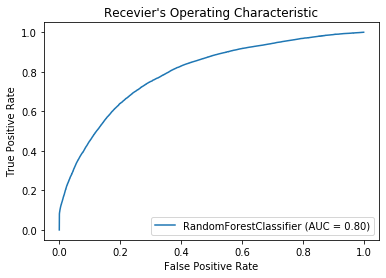

In [203]:
pred_prob4 = model4.predict_proba(train_x)
test_pred_prob4 = model4.predict_proba(test_x)

from sklearn.metrics import classification_report as rep
print(rep( test_y , test_pred4 ))
train_auc_score4 = roc_auc_score(train_y, pred_prob4[:,1])
test_auc_score4 = roc_auc_score(test_y, test_pred_prob4[:,1])
print(train_auc_score4,test_auc_score4)
metrics.plot_roc_curve(model4, test_x, test_y)
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [81]:
xgb_params = {
    'learning_rate' : [0.1,0.12],
    'max_depth' : [20,21],
    'min_child_weight' : [11,12],
    'n_estimators' : [300,301],
    'subsample' : [0.6, 0.61], 
    'colsample_bytree' : [0.6, 0.61]

}

grid_object = GridSearchCV(estimator = model5, 
                           param_grid = xgb_params, 
                           scoring = 'roc_auc',
                           cv = 5, 
                           n_jobs = -1)

#Fitting the grid to the training data
grid_object.fit(train_x, train_y)
#Extracting the best parameters
grid_object.best_params_

[19:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300}

In [82]:
grid_object.best_score_

0.7611461582815867

In [205]:
model5 = XGBClassifier(learning_rate = 0.1,
                       max_depth = 20,
                       min_child_weight = 11
                       )
                                
model5.fit(train_x, train_y)
print(model5.score(train_x, train_y))
print(model5.score(test_x, test_y))

[11:16:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8267758406450598
0.7964871156256613


              precision    recall  f1-score   support

           0       0.82      0.94      0.88     46859
           1       0.65      0.35      0.45     14572

    accuracy                           0.80     61431
   macro avg       0.74      0.64      0.67     61431
weighted avg       0.78      0.80      0.78     61431

0.8470194589364499 0.7884923532900053


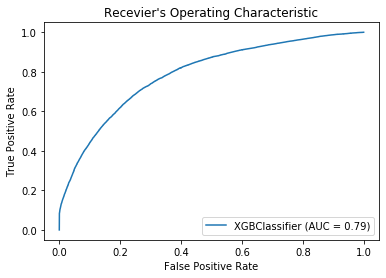

In [206]:
pred_prob5 = model5.predict_proba(train_x)
test_pred_prob5 = model5.predict_proba(test_x)

from sklearn.metrics import classification_report as rep
print(rep( test_y , test_pred5 ))
train_auc_score5 = roc_auc_score(train_y, pred_prob5[:,1])
test_auc_score5 = roc_auc_score(test_y, test_pred_prob5[:,1])
print(train_auc_score5,test_auc_score5)
metrics.plot_roc_curve(model5, test_x, test_y)
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [176]:
test=pd.read_csv(r"C:\Users\YashnaBehera\Desktop\AV course\ML\test_mSzZ8RL.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [177]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [178]:
#allocating correct data type to the features
test["Gender"]=test["Gender"].astype("category")
test["Region_Code"]=test["Region_Code"].astype("category")
test["Occupation"]=test["Occupation"].astype("category")
test["Channel_Code"]=test["Channel_Code"].astype("category")
test["Credit_Product"]=test["Credit_Product"].astype("category")
test["Is_Active"]=test["Is_Active"].astype("category")

In [179]:
test['Counts'] = test.groupby(['Region_Code'])['Occupation'].transform('count')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Counts
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,11737
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,15125
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3440
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,2338
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,3440


In [180]:
test.Region_Code.value_counts()

RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

In [181]:
bins = [500, 1000, 2000, 5000, 16000]
labels = ['1','2', '3', '4']
test['region_type'] = pd.cut(test.Counts, bins, labels = labels,include_lowest = True)
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Counts,region_type
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,11737,4
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,15125,4
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3440,3
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,2338,3
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,3440,3


In [182]:
credit_product_mode = test.pivot_table(values='Credit_Product', columns='Vintage', aggfunc=(lambda x: x.mode()[0]))
#channel_mode
miss_bool = test['Credit_Product'].isnull()
test.loc[miss_bool, 'Credit_Product'] = test.loc[miss_bool, 'Vintage'].apply(lambda x:credit_product_mode[x])

In [183]:
#calculating max limit for removing outliers
quant25 = test["Avg_Account_Balance"].quantile(0.25)
quant75 = test["Avg_Account_Balance"].quantile(0.75)
IQR = quant75 - quant25
med = test["Avg_Account_Balance"].median()
whis_high = med+(1.5*IQR)
whis_high

2048058.5

In [184]:
#separating outliers from the dataset
out_rem_acc_test = test[test['Avg_Account_Balance'] < 2048058.5]
out_rem_acc_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Counts,region_type
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,11737,4
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,925537,No,15125,4
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3440,3
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,2338,3
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,3440,3


In [185]:
test['Avg_Account_Balance'].isnull().sum()

0

In [186]:
test['Avg_Account_Balance'] = out_rem_acc_test['Avg_Account_Balance']
test['Avg_Account_Balance'].isnull().sum()

10643

In [187]:
avg_acc_balance_mean = test.pivot_table(values='Avg_Account_Balance', columns='Occupation', aggfunc='mean')
avg_acc_balance_mean

Occupation,Entrepreneur,Other,Salaried,Self_Employed
Avg_Account_Balance,1.114989e+06,951330.847868,851995.838705,925456.815811


In [188]:
#replacing average acount balance null values with occupation mean
loc1 = test['Avg_Account_Balance'].isnull()
test.loc[loc1, 'Avg_Account_Balance'] = test.loc[loc1, 'Occupation'].apply(lambda x: avg_acc_balance_mean[x])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "C:\Users\YashnaBehera\anaconda3\lib\site-packages\pandas\core\generic.py", line 1799, in __hash__
    f"{repr(type(self).__name__)} objects are mutable, "
TypeError: 'Series' objects are mutable, thus they cannot be hashed


In [189]:
#labelencoding categorical data
from sklearn.preprocessing import LabelEncoder
test_encoded = test.copy()
test_encoded.loc[:,['Gender','Occupation','Channel_Code','Credit_Product','Is_Active']] = train_encoded.loc[:,['Gender',
                                                            'Occupation','Channel_Code','Credit_Product','Is_Active']].apply(LabelEncoder().fit_transform) 

In [190]:
test_encoded.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Counts,region_type
0,VBENBARO,0,29,RG254,1,2,25,0,742366.0,0,11737,4
1,CCMEWNKY,0,43,RG268,2,0,49,0,925537.0,0,15125,4
2,VK3KGA9M,0,31,RG270,3,2,14,0,215949.0,1,3440,3
3,TT8RPZVC,1,29,RG272,2,0,33,0,868070.0,0,2338,3
4,SHQZEYTZ,0,29,RG270,2,0,19,0,657087.0,0,3440,3


In [191]:
test_encoded.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Counts                 0
region_type            0
dtype: int64

In [192]:
test_1=test_encoded.drop(['Region_Code','Counts','ID'],axis=1)

### Normalising using *min_max_scaler*

In [193]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_2=scaler.fit_transform(test_1)

In [194]:
test_pred=model4.predict(test_2)

In [195]:
test['Is_Lead']=test_pred

In [197]:
test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Counts,region_type,Is_Lead
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,7.423660e+05,No,11737,4,0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,No,9.255370e+05,No,15125,4,1
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,2.159490e+05,No,3440,3,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,8.680700e+05,No,2338,3,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,6.570870e+05,No,3440,3,0
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,9.254568e+05,No,15125,4,1
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1.032764e+06,No,810,1,0
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,8.370090e+05,No,2588,3,0
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,No,1.001232e+06,Yes,8173,4,1
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1.667851e+06,No,12881,4,0


In [198]:
test[test["Occupation"]=="Entrepreneur"]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Counts,region_type,Is_Lead
41,ICTFGWQR,Female,48,RG268,Entrepreneur,X3,117,Yes,1.114989e+06,No,15125,4,1
71,7IP5SSRR,Female,51,RG283,Entrepreneur,X3,98,Yes,9.230270e+05,Yes,12881,4,1
81,JTYNEKRQ,Male,52,RG283,Entrepreneur,X3,97,Yes,1.114989e+06,No,12881,4,1
177,I4NYEDFE,Male,49,RG268,Entrepreneur,X1,31,Yes,1.114989e+06,Yes,15125,4,0
328,68EFFKBB,Male,52,RG268,Entrepreneur,X3,97,Yes,1.558843e+06,Yes,15125,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104945,KIKBQPE4,Male,48,RG284,Entrepreneur,X2,85,No,5.341690e+05,No,8173,4,1
105046,BKRCA3TY,Male,50,RG283,Entrepreneur,X3,98,Yes,6.557690e+05,No,12881,4,1
105058,AV2TAEUW,Male,45,RG268,Entrepreneur,X1,61,No,9.357990e+05,No,15125,4,0
105120,DARHV2RS,Female,49,RG276,Entrepreneur,X3,56,Yes,7.996650e+05,No,1185,2,1
